# House pricing prediction


## Dependency management

In [111]:
%pip install scikit-learn
%pip install pandas 
%pip install seaborn
%pip install tensorflow
%pip install xgboost
%pip install lightgbm
%pip install pygad
%pip install scikeras


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



## Data Cleaning and Data Analysis

We are going to read the training data set and prepare all the required data to train later our models.

## Load the data sets

We load the nr_dfs from the CSV (the trainingset and the test nr_df)

In [112]:
# Import pandas
import pandas as pd

In [113]:
# Package for linear regressions


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_log_error

In [114]:
train_url = './houses/train.csv'
test_url = './houses/test.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

print("Training dataset shape", train.shape)
print("Test dataset shape", test.shape)



Training dataset shape (1460, 81)
Test dataset shape (1459, 80)


In [115]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Remove outliers

In [132]:
# Calculate the upper and lower limits
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(train['SalePrice'] >= upper)[0]
lower_array = np.where(train['SalePrice'] <= lower)[0]
 
# Removing the outliers
train.drop(index=upper_array, inplace=True)
train.drop(index=lower_array, inplace=True)


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1201 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             91 non-null     object 
 7   LotShape          1460 non-null   object 
 8   LandContour       1460 non-null   object 
 9   Utilities         1460 non-null   object 
 10  LotConfig         1460 non-null   object 
 11  LandSlope         1460 non-null   object 
 12  Neighborhood      1460 non-null   object 
 13  Condition1        1460 non-null   object 
 14  Condition2        1460 non-null   object 
 15  BldgType          1460 non-null   object 
 16  HouseStyle        1460 non-null   object 


In [117]:
feature_cols = train.columns[1:-1]
print("Features num=", len(feature_cols), feature_cols)

Features num= 79 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'Feature1stFlrSF', 'Feature2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       

### Extract the features from the categories


In [118]:
# you want all rows, and the feature_cols' columns
train_X = train.loc[:, feature_cols]
test_X = test.loc[:, feature_cols]


In [119]:
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [120]:
train_y =  np.log(train.loc[:, ["SalePrice"] ])


In [121]:
train_y.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


### Now we are going to normalize the data

We have X as the feature dataframe and y as the label dataframe

In [122]:
# Import ydata for data profiling
#from ydata_profiling import ProfileReport

In [123]:
#profile = ProfileReport(train, title="DataProfile")

In [124]:
#profile.to_notebook_iframe()

In [125]:
#profile.to_file("books_data.html")

### Handling missing values

We are going to handle the missing values; column by column

In [126]:
# check for missing values
print(train.isnull())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [127]:
# List empty columns
print("Empty columns in training set", train_X.columns[train_X.isnull().any()])

Empty columns in training set Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [128]:
def normalize_dataset(dataset: pd.DataFrame):
    null_columns = dataset.columns[dataset.isnull().any()]
    assert null_columns.empty != True, "we should have null columns"
    # Copy before normalization
    nr_df = dataset.copy()    
    
    # Replace missing values with the mean of the column since the values are relatively balanced
    nr_df['LotFrontage'] = nr_df['LotFrontage'].fillna(nr_df['LotFrontage'].median()) 

    # MasVnrArea (59% of zero, 8 missing values; I put zero instead)
    nr_df['MasVnrArea'] = nr_df['MasVnrArea'].fillna(0) 

    nr_df['Utilities'] = nr_df['Utilities'].fillna('NA') 

    nr_df['BsmtFinSF1'] = nr_df['BsmtFinSF1'].fillna(nr_df['BsmtFinSF1'].median()) 
    nr_df['BsmtFinSF2'] = nr_df['BsmtFinSF2'].fillna(nr_df['BsmtFinSF2'].median()) 
    nr_df['BsmtUnfSF'] = nr_df['BsmtUnfSF'].fillna(nr_df['BsmtUnfSF'].median()) 
    nr_df['TotalBsmtSF'] = nr_df['TotalBsmtSF'].fillna(nr_df['TotalBsmtSF'].median()) 
    nr_df['GarageCars'] = nr_df['GarageCars'].fillna(nr_df['GarageCars'].median()) 
    nr_df['GarageYrBlt'] = nr_df['GarageYrBlt'].fillna(nr_df['GarageYrBlt'].median()) 
    nr_df['BsmtFullBath'] = nr_df['BsmtFullBath'].fillna(nr_df['BsmtFullBath'].median()) 
    nr_df['BsmtHalfBath'] = nr_df['BsmtHalfBath'].fillna(nr_df['BsmtHalfBath'].median()) 
    nr_df['GarageArea'] = nr_df['GarageArea'].fillna(nr_df['GarageArea'].median()) 
                
    ## Proposed new features
    nr_df['HasPool'] = nr_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['Has2ndFloor'] = nr_df['Feature2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['HasGarage'] = nr_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['HasBsmt'] = nr_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['HasFireplace'] = nr_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['BltSoldYrDiff'] = nr_df['YrSold'].astype(np.int64) - nr_df['YearBuilt']
    nr_df['TotalSF'] = nr_df['TotalBsmtSF'] + nr_df['Feature1stFlrSF'] + nr_df['Feature2ndFlrSF']
    nr_df['TotalBathr'] = nr_df['FullBath'] + 0.5 * nr_df['HalfBath'] + nr_df['BsmtFullBath'] + 0.5 * nr_df['BsmtHalfBath']
    nr_df['TotalPorchSF'] = nr_df['OpenPorchSF'] + nr_df['Feature3SsnPorch'] + nr_df['EnclosedPorch'] + nr_df['ScreenPorch'] + nr_df['WoodDeckSF']    
            
    nr_df['YearBuilt'].apply(str)
    nr_df['YearRemodAdd'].apply(str)
                            
    # Random values with normalized proportion
    colnames = ['GarageFinish', 
                'GarageQual', 
                'GarageCond', 
                'Fence', 
                'MiscFeature', 
                'PoolQC', 
                'GarageType', 
                'FireplaceQu', 
                'Electrical', 
                'BsmtFinType2', 
                'BsmtFinType1', 
                'BsmtExposure', 
                'BsmtCond', 
                'BsmtQual', 
                'MasVnrType', 
                'Alley',
                'MSZoning', 
                'Exterior1st', 
                'Exterior2nd', 
                'KitchenQual', 
                'Functional', 
                'SaleType']
    for col in colnames:
        normCol =  nr_df[col].value_counts(normalize=True)
        #nr_df[col] = nr_df[col].fillna(pd.Series(np.random.choice(normCol.index, 
        #                                                p=normCol.tolist(), size=len(nr_df)))) 
        nr_df[col] = nr_df[col].fillna("NA")
    
    
    null_columns = nr_df.columns[nr_df.isnull().any()]
    assert null_columns.empty == True, "we should NOT have null columns" + null_columns
   
    
    ##nr_df.columns[nr_df.isnull().any()]
    return nr_df

In [129]:
train_norm_X_df = normalize_dataset(train_X)
test_norm_X_df = normalize_dataset(test_X)


# Convert features with categories into numbers
featureWithStrings = train_norm_X_df.select_dtypes(include=['object']).columns

def generate_dummies(df: pd.DataFrame, colName: str):
    print(df.keys())
    one_hot = pd.get_dummies(prefix=colName, prefix_sep="_",data=df[colName])
    data_df = df.drop(colName,axis = 1)
    return data_df.join(one_hot)



In [110]:
#train_norm_X_df = generate_dummies(train_norm_X_df, colName="MSZoning")
#test_norm_X_df = generate_dummies(test_norm_X_df, colName='MSZoning')

#train_norm_X_df = generate_dummies(train_norm_X_df, colName="Street")
#test_norm_X_df = generate_dummies(test_norm_X_df, colName='Street')
featureWithStrings = train_norm_X_df.select_dtypes(include=['object']).columns
print(featureWithStrings)
for col in featureWithStrings:
    try:
        enc = LabelEncoder()
        mcol = pd.concat([train_norm_X_df[col], test_norm_X_df[col]])
        enc.fit(mcol)
        #print(mcol.info())
        train_norm_X_df[col] = enc.transform(train_norm_X_df[col])
        test_norm_X_df[col] = enc.transform(test_norm_X_df[col])
    except Exception as error:
        print("Exception with the column " + col)

print(train_norm_X_df.shape)
print(test_norm_X_df)


Index([], dtype='object')
(1460, 88)
        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         3         80.0    11622       1      1   
1     1462          20         4         81.0    14267       1      1   
2     1463          60         4         74.0    13830       1      1   
3     1464          60         4         78.0     9978       1      1   
4     1465         120         4         43.0     5005       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         5         21.0     1936       1      1   
1455  2916         160         5         21.0     1894       1      1   
1456  2917          20         4        160.0    20000       1      1   
1457  2918          85         4         62.0    10441       1      1   
1458  2919          60         4         74.0     9627       1      1   

      LotShape  LandContour  Utilities  ...  SaleCondition  HasPool  \
0            3 

### Check correlations with variables

We will output some graphs to check the correlations between the features and the price



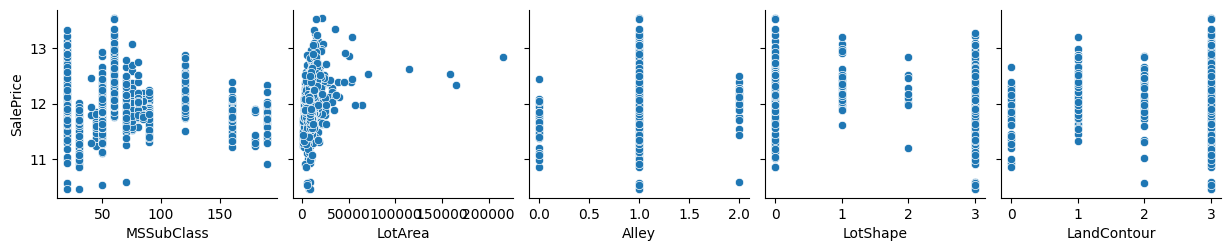

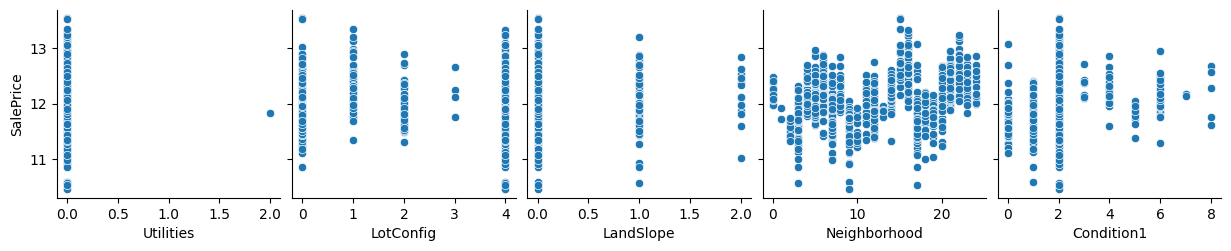

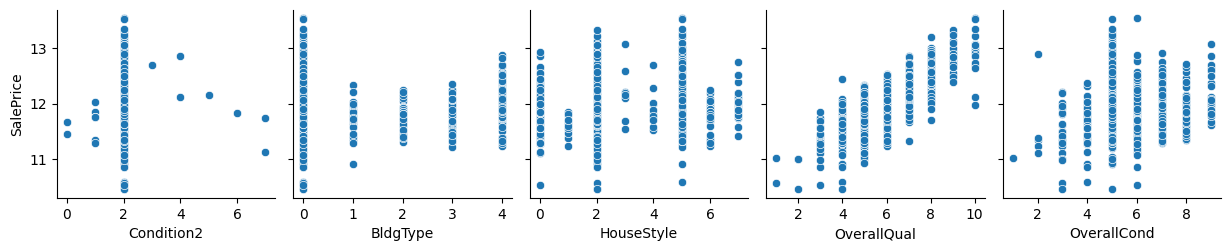

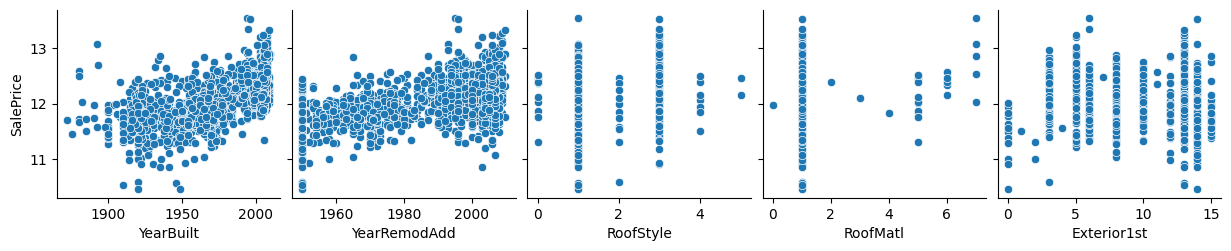

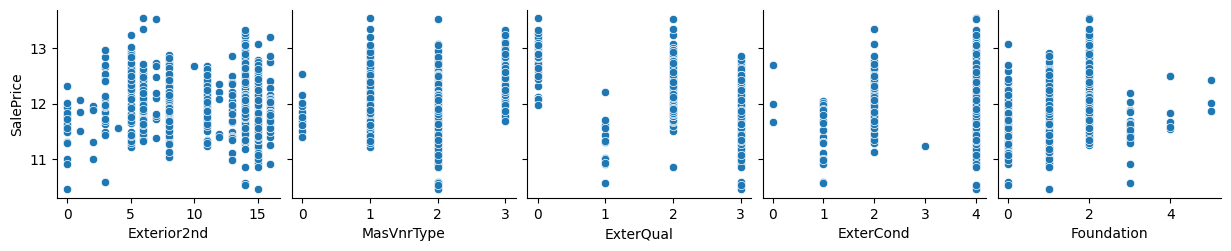

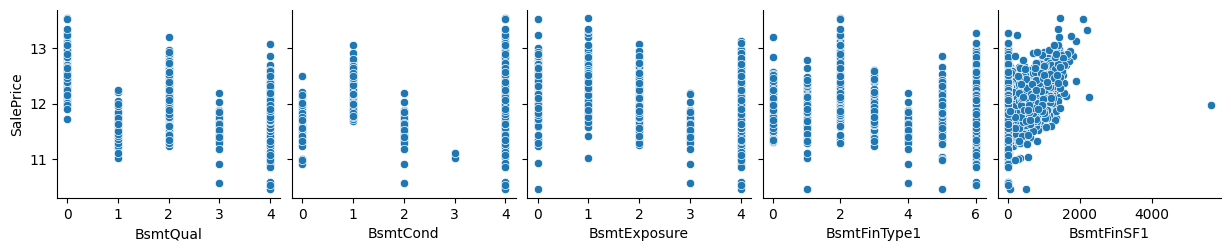

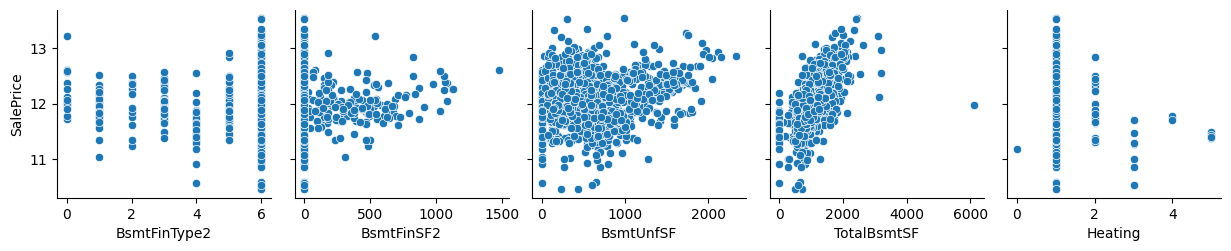

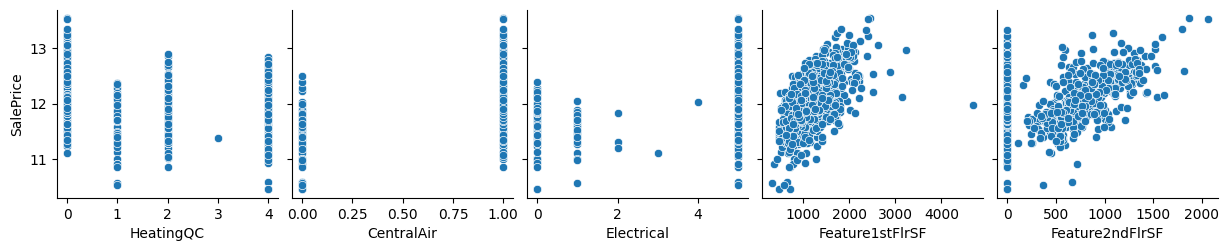

In [43]:
numeric_features = train_norm_X_df.select_dtypes(include=['int64']).columns

visu_df = train_norm_X_df.copy()
visu_df["SalePrice"] = train_y
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[:5])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[5:10])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[10:15])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[15:20])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[20:25])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[25:30])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[30:35])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[35:40])

In [134]:
## Export cleant data

df = train_norm_X_df.copy()
df['SalePrice'] = train.loc[:, ["SalePrice"] ];

df.to_csv('out.csv', index=False)  
test_norm_X_df.to_csv('test_norm.csv', index=False)  


In [50]:


split_features_X_df, valid_features_X_df = train_test_split(train_norm_X_df, test_size=0.2, shuffle=False)
split_categ_y_df, valid_categ_y_df = train_test_split(train_y, test_size=0.2, shuffle=False)

columns = split_features_X_df.columns[1: ]
print(columns)

print("split_features_X_df", split_features_X_df.shape)
print("valid_features_X_df", valid_features_X_df.shape)
print("split_categ_y_df", split_categ_y_df.shape)
print("valid_categ_y_df", valid_categ_y_df.shape)

Index(['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Feature1stFlrSF',
       'Feature2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [140]:
df_prediction = pd.read_csv('./a90b0914-068a-49e7-ab81-f9d5c0fe61fc_full_prediction.csv')
df_prediction['Id'] = test[['Id']]  # Adjust column names as needed
df_prediction = df_prediction[['Id', 'SalePrice']]
df_prediction.to_csv("prediction.csv", index=False)
